# 1.Training and validation - Classification Decision Tree Boston Dataset

In [1]:
# Librerias base
library(caret) # Libreria de Machine learning
library(Matrix) # Libreria para componer eleentos matriciales
library(rpart) # Libreria para generar el decision tree
library(e1071)

# Librerias para visualizar el decision tree
library(rattle)
library(rpart.plot)
library(RColorBrewer)

Loading required package: lattice

Loading required package: ggplot2

Warning message:
“package ‘rattle’ was built under R version 4.0.3”
Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



Cargamos el raw dataset

In [2]:
raw_data = read.csv('datos_ciudad.csv', sep = ',')
head(raw_data)

,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value,class
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0


In [3]:
# En este caso retiramos la variable de median_value pues buscamos clasificar 
median_value = c(14)
raw_data_no_value = raw_data[,-median_value]
head(raw_data_no_value)

,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,class
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,0
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,0
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,0
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,0
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,0


In [4]:
# Generamos 2 datasets para nuestro modelo
set.seed(123)

# Percentages
fractionTraining   <- 0.80
fractionValidation <- 0.20

# Compute sample sizes.
sampleSizeTraining   <- floor(fractionTraining   * nrow(raw_data_no_value))
sampleSizeValidation <- floor(fractionValidation * nrow(raw_data_no_value))

# Create the randomly-sampled indices for the dataframe. Use setdiff() to
# avoid overlapping subsets of indices.
indicesTraining    <- sort(sample(seq_len(nrow(raw_data_no_value)), size=sampleSizeTraining))
indicesNotTraining <- setdiff(seq_len(nrow(raw_data_no_value)), indicesTraining)
indicesValidation  <- sort(sample(indicesNotTraining, size=sampleSizeValidation))

# Finally, output the three dataframes for training, validation and test.
dfTraining   <- raw_data_no_value[indicesTraining, ]
dfValidation <- raw_data_no_value[indicesValidation, ]

In [5]:
head(dfValidation)
head(dfTraining)

,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,class
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,0
15,0.63796,0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,0
17,1.05393,0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58,0
19,0.80271,0,8.14,0,0.538,5.456,36.6,3.7965,4,307,21.0,288.99,11.69,0
28,0.95577,0,8.14,0,0.538,6.047,88.8,4.4534,4,307,21.0,306.38,17.28,0
37,0.09744,0,5.96,0,0.499,5.841,61.4,3.3779,5,279,19.2,377.56,11.41,0


,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,class
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,0
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,0
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,0
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,0
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,0
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,0


## Modelo

In [6]:
# Establecemos la variable target y establecemos el tipo de dato como label
target <- c(14)
class_label <- dfTraining[,target]

In [7]:
##Generamos una entrada de control features
control_features <- rpart.control(xval = 10 #Cross validation del dataset
                                  , maxdepth = c(4,6,8,10,12)) #Vector con iteraciones máximas para el clasificador

Warning message in if (maxdepth > 30L) stop("Maximum depth is 30"):
“the condition has length > 1 and only the first element will be used”
Warning message in if (maxdepth < 1L) stop("Maximum depth must be at least 1"):
“the condition has length > 1 and only the first element will be used”


In [8]:
#Función del decision tree
decision_tree <- rpart(class ~.
                       , data=dfTraining
                       , method="class"
                       , control = control_features)

#Descripcion de la estructura de la funcion
print(decision_tree)

n= 404 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 404 28 0 (0.93069307 0.06930693)  
  2) rooms_per_dwelling< 7.437 382  7 0 (0.98167539 0.01832461) *
  3) rooms_per_dwelling>=7.437 22  1 1 (0.04545455 0.95454545) *


In [9]:
predicted_values <- predict(decision_tree, dfTraining, type = "class")
prediction_df <- data.frame(reference = dfTraining$class, prediction = predicted_values)

In [10]:
confusion_values_dtrees <- confusionMatrix(prediction_df$prediction, reference = as.factor(prediction_df$reference))
confusion_values_dtrees

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 375   7
         1   1  21
                                          
               Accuracy : 0.9802          
                 95% CI : (0.9614, 0.9914)
    No Information Rate : 0.9307          
    P-Value [Acc > NIR] : 5.238e-06       
                                          
                  Kappa : 0.8296          
                                          
 Mcnemar's Test P-Value : 0.0771          
                                          
            Sensitivity : 0.9973          
            Specificity : 0.7500          
         Pos Pred Value : 0.9817          
         Neg Pred Value : 0.9545          
             Prevalence : 0.9307          
         Detection Rate : 0.9282          
   Detection Prevalence : 0.9455          
      Balanced Accuracy : 0.8737          
                                          
       'Positive' Class : 0               
                              

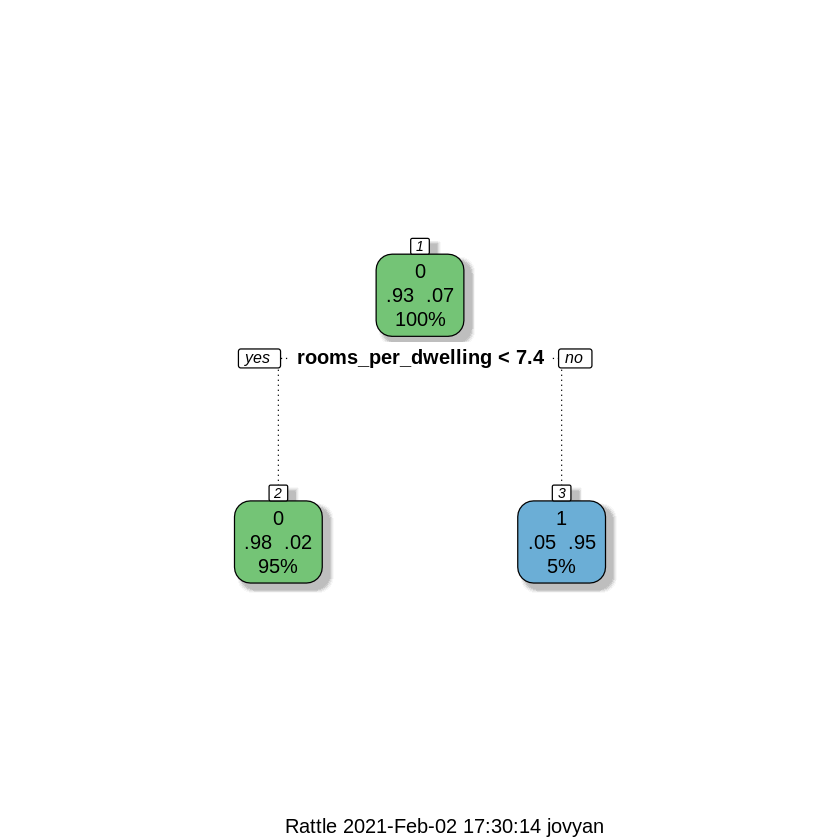

In [11]:
##Representacion grafica del decision tree
fancyRpartPlot(decision_tree)

In [12]:
predicted_values_test <- predict(decision_tree, dfValidation, type = "class")
prediction_df_test <- data.frame(reference = dfValidation$class, prediction = predicted_values_test)
confusion_values_dtrees <- confusionMatrix(prediction_df_test$prediction, reference = as.factor(prediction_df_test$reference))
confusion_values_dtrees

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 91  2
         1  1  7
                                          
               Accuracy : 0.9703          
                 95% CI : (0.9156, 0.9938)
    No Information Rate : 0.9109          
    P-Value [Acc > NIR] : 0.01734         
                                          
                  Kappa : 0.8074          
                                          
 Mcnemar's Test P-Value : 1.00000         
                                          
            Sensitivity : 0.9891          
            Specificity : 0.7778          
         Pos Pred Value : 0.9785          
         Neg Pred Value : 0.8750          
             Prevalence : 0.9109          
         Detection Rate : 0.9010          
   Detection Prevalence : 0.9208          
      Balanced Accuracy : 0.8835          
                                          
       'Positive' Class : 0               
                                    